In [89]:
#%pip install -r requirements.txt

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats
from scipy.stats import norm

In [2]:
interest_rate = pd.read_csv('./data/interest_rate.csv')
energy_price = pd.read_csv('./data/energy_price.csv')
cpi = pd.read_csv('./data/cpi.csv')

In [ ]:
##################################__DATA SANITY CHECKS__################################################

In [3]:
interest_rate.head(1000)

,location,interest_rate_long_term,year,month,interest_rate_short_term,interest_rate_immediate_term
0,AUS,7.177895,2000,1,5.66,5.00
1,AUS,6.957619,2000,2,5.80,5.48
2,AUS,6.570435,2000,3,5.89,5.50
3,AUS,6.264706,2000,4,6.04,5.72
4,AUS,6.465652,2000,5,6.31,5.98
...,...,...,...,...,...,...
995,USA,2.530000,2014,9,0.12,0.09
996,USA,2.300000,2014,10,0.12,0.09
997,USA,2.330000,2014,11,0.13,0.09
998,USA,2.210000,2014,12,0.15,0.12


In [4]:
cpi.head(1000)

,location,cpi-index,year,month
0,AUS,3.700000,1948,9
1,AUS,3.733333,1948,10
2,AUS,3.766667,1948,11
3,AUS,3.800000,1948,12
4,AUS,3.833333,1949,1
...,...,...,...,...
995,USA,174.100000,2000,11
996,USA,174.000000,2000,12
997,USA,175.100000,2001,1
998,USA,175.800000,2001,2


In [5]:
energy_price.head(1000)

,energy_price,year,month,energy_price_lag_1m,energy_price_lag_2m,energy_price_lag_3m,energy_price_lag_4m,energy_price_lag_5m,energy_price_lag_6m,energy_price_lag_7m,...,energy_price_lag_40m,energy_price_lag_41m,energy_price_lag_42m,energy_price_lag_43m,energy_price_lag_44m,energy_price_lag_45m,energy_price_lag_46m,energy_price_lag_47m,energy_price_lag_48m,location
0,50.870,2007,1,58.015,55.275,55.020,58.850,68.240,68.460,64.715,...,26.360,28.800,27.380,26.70,26.17,25.38,29.80,31.845,30.430,AUS
1,53.995,2007,2,50.870,58.015,55.275,55.020,58.850,68.240,68.460,...,28.160,26.360,28.800,27.38,26.70,26.17,25.38,29.800,31.845,AUS
2,58.055,2007,3,53.995,50.870,58.015,55.275,55.020,58.850,68.240,...,28.515,28.160,26.360,28.80,27.38,26.70,26.17,25.380,29.800,AUS
3,63.785,2007,4,58.055,53.995,50.870,58.015,55.275,55.020,58.850,...,29.640,28.515,28.160,26.36,28.80,27.38,26.70,26.170,25.380,AUS
4,64.450,2007,5,63.785,58.055,53.995,50.870,58.015,55.275,55.020,...,30.370,29.640,28.515,28.16,26.36,28.80,27.38,26.700,26.170,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,109.550,2022,5,101.780,108.500,91.640,83.220,71.710,79.150,81.480,...,51.380,49.520,56.960,70.75,70.23,68.06,70.98,67.870,69.980,USA
532,114.840,2022,6,109.550,101.780,108.500,91.640,83.220,71.710,79.150,...,54.950,51.380,49.520,56.96,70.75,70.23,68.06,70.980,67.870,USA
533,101.620,2022,7,114.840,109.550,101.780,108.500,91.640,83.220,71.710,...,58.150,54.950,51.380,49.52,56.96,70.75,70.23,68.060,70.980,USA
534,93.670,2022,8,101.620,114.840,109.550,101.780,108.500,91.640,83.220,...,63.860,58.150,54.950,51.38,49.52,56.96,70.75,70.230,68.060,USA


In [6]:
df = interest_rate.merge(cpi, on=['location', 'year', 'month'], suffixes=('', '_delme'))
df = df.merge(energy_price, on=['location', 'year', 'month'], suffixes=('', '_delme'))
df = df[[c for c in df.columns if not c.endswith('_delme')]]

In [7]:
df.head(1000)

,location,interest_rate_long_term,year,month,interest_rate_short_term,interest_rate_immediate_term,cpi-index,energy_price,energy_price_lag_1m,energy_price_lag_2m,...,energy_price_lag_39m,energy_price_lag_40m,energy_price_lag_41m,energy_price_lag_42m,energy_price_lag_43m,energy_price_lag_44m,energy_price_lag_45m,energy_price_lag_46m,energy_price_lag_47m,energy_price_lag_48m
0,AUS,5.877619,2007,1,6.43,6.25,86.600000,50.870,58.015,55.275,...,28.160,26.360,28.800,27.380,26.70,26.17,25.38,29.80,31.845,30.430
1,AUS,5.809250,2007,2,6.37,6.25,86.600000,53.995,50.870,58.015,...,28.515,28.160,26.360,28.800,27.38,26.70,26.17,25.38,29.800,31.845
2,AUS,5.736818,2007,3,6.43,6.25,86.600000,58.055,53.995,50.870,...,29.640,28.515,28.160,26.360,28.80,27.38,26.70,26.17,25.380,29.800
3,AUS,5.909722,2007,4,6.48,6.25,86.966667,63.785,58.055,53.995,...,30.370,29.640,28.515,28.160,26.36,28.80,27.38,26.70,26.170,25.380
4,AUS,5.920869,2007,5,6.37,6.25,87.333333,64.450,63.785,58.055,...,29.730,30.370,29.640,28.515,28.16,26.36,28.80,27.38,26.700,26.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,USA,2.900000,2022,5,1.33,0.77,292.296000,109.550,101.780,108.500,...,54.950,51.380,49.520,56.960,70.75,70.23,68.06,70.98,67.870,69.980
457,USA,3.140000,2022,6,1.87,1.21,296.311000,114.840,109.550,101.780,...,58.150,54.950,51.380,49.520,56.96,70.75,70.23,68.06,70.980,67.870
458,USA,2.900000,2022,7,2.50,1.68,296.276000,101.620,114.840,109.550,...,63.860,58.150,54.950,51.380,49.52,56.96,70.75,70.23,68.060,70.980
459,USA,2.900000,2022,8,2.76,2.33,296.171000,93.670,101.620,114.840,...,60.830,63.860,58.150,54.950,51.38,49.52,56.96,70.75,70.230,68.060


In [8]:
#Columns present in the dataset
df.columns

Index(['location', 'interest_rate_long_term', 'year', 'month',
       'interest_rate_short_term', 'interest_rate_immediate_term', 'cpi-index',
       'energy_price', 'energy_price_lag_1m', 'energy_price_lag_2m',
       'energy_price_lag_3m', 'energy_price_lag_4m', 'energy_price_lag_5m',
       'energy_price_lag_6m', 'energy_price_lag_7m', 'energy_price_lag_8m',
       'energy_price_lag_9m', 'energy_price_lag_10m', 'energy_price_lag_11m',
       'energy_price_lag_12m', 'energy_price_lag_13m', 'energy_price_lag_14m',
       'energy_price_lag_15m', 'energy_price_lag_16m', 'energy_price_lag_17m',
       'energy_price_lag_18m', 'energy_price_lag_19m', 'energy_price_lag_20m',
       'energy_price_lag_21m', 'energy_price_lag_22m', 'energy_price_lag_23m',
       'energy_price_lag_24m', 'energy_price_lag_25m', 'energy_price_lag_26m',
       'energy_price_lag_27m', 'energy_price_lag_28m', 'energy_price_lag_29m',
       'energy_price_lag_30m', 'energy_price_lag_31m', 'energy_price_lag_32m',
     

In [9]:
#Checking for null values
df.isnull().sum()

location                        0
interest_rate_long_term         0
year                            0
month                           0
interest_rate_short_term        0
interest_rate_immediate_term    0
cpi-index                       0
energy_price                    0
energy_price_lag_1m             0
energy_price_lag_2m             0
energy_price_lag_3m             0
energy_price_lag_4m             0
energy_price_lag_5m             0
energy_price_lag_6m             0
energy_price_lag_7m             0
energy_price_lag_8m             0
energy_price_lag_9m             0
energy_price_lag_10m            0
energy_price_lag_11m            0
energy_price_lag_12m            0
energy_price_lag_13m            0
energy_price_lag_14m            0
energy_price_lag_15m            0
energy_price_lag_16m            0
energy_price_lag_17m            0
energy_price_lag_18m            0
energy_price_lag_19m            0
energy_price_lag_20m            0
energy_price_lag_21m            0
energy_price_l

In [10]:
#Checking datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   location                      461 non-null    object 
 1   interest_rate_long_term       461 non-null    float64
 2   year                          461 non-null    int64  
 3   month                         461 non-null    int64  
 4   interest_rate_short_term      461 non-null    float64
 5   interest_rate_immediate_term  461 non-null    float64
 6   cpi-index                     461 non-null    float64
 7   energy_price                  461 non-null    float64
 8   energy_price_lag_1m           461 non-null    float64
 9   energy_price_lag_2m           461 non-null    float64
 10  energy_price_lag_3m           461 non-null    float64
 11  energy_price_lag_4m           461 non-null    float64
 12  energy_price_lag_5m           461 non-null    float64
 13  energ

In [11]:
#Stats of data
df.describe()

,interest_rate_long_term,year,month,interest_rate_short_term,interest_rate_immediate_term,cpi-index,energy_price,energy_price_lag_1m,energy_price_lag_2m,energy_price_lag_3m,...,energy_price_lag_39m,energy_price_lag_40m,energy_price_lag_41m,energy_price_lag_42m,energy_price_lag_43m,energy_price_lag_44m,energy_price_lag_45m,energy_price_lag_46m,energy_price_lag_47m,energy_price_lag_48m
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,...,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,3.312709,2012.295011,6.446855,2.280998,2.088178,174.297358,67.712755,67.477148,67.182039,66.879132,...,62.033004,61.889479,61.728156,61.533601,61.375249,61.220694,61.086291,60.953774,60.803308,60.597690
std,1.450149,6.078451,3.440155,2.022390,1.987831,62.339445,26.694897,26.771125,26.822386,26.796579,...,28.950569,29.049724,29.140697,29.246091,29.347129,29.449700,29.545213,29.638045,29.729643,29.803248
min,0.620000,2000.000000,1.000000,0.010000,0.050000,86.600000,17.730000,16.550000,16.550000,16.550000,...,11.280000,11.280000,11.280000,11.280000,11.280000,11.280000,11.280000,11.280000,11.280000,11.280000
25%,2.200000,2008.000000,3.000000,0.370000,0.180000,109.133333,46.840000,46.710000,46.620000,46.220000,...,39.310000,38.645000,38.190000,37.550000,36.760000,36.400000,35.870000,34.960000,34.405000,34.270000
50%,3.010000,2013.000000,6.000000,1.830000,1.500000,183.900000,64.210000,64.090000,63.870000,63.785000,...,58.850000,58.700000,58.580000,58.150000,58.055000,58.015000,57.880000,57.710000,57.690000,57.440000
75%,4.340000,2017.000000,9.000000,3.370000,3.210000,231.407000,89.570000,89.420000,88.610000,88.265000,...,84.400000,84.400000,84.400000,84.400000,84.400000,84.400000,84.400000,84.400000,84.400000,84.400000
max,6.660000,2022.000000,12.000000,7.900000,7.250000,296.808000,133.930000,133.930000,133.930000,133.930000,...,133.930000,133.930000,133.930000,133.930000,133.930000,133.930000,133.930000,133.930000,133.930000,133.930000


In [12]:
df.head(1000)

,location,interest_rate_long_term,year,month,interest_rate_short_term,interest_rate_immediate_term,cpi-index,energy_price,energy_price_lag_1m,energy_price_lag_2m,...,energy_price_lag_39m,energy_price_lag_40m,energy_price_lag_41m,energy_price_lag_42m,energy_price_lag_43m,energy_price_lag_44m,energy_price_lag_45m,energy_price_lag_46m,energy_price_lag_47m,energy_price_lag_48m
0,AUS,5.877619,2007,1,6.43,6.25,86.600000,50.870,58.015,55.275,...,28.160,26.360,28.800,27.380,26.70,26.17,25.38,29.80,31.845,30.430
1,AUS,5.809250,2007,2,6.37,6.25,86.600000,53.995,50.870,58.015,...,28.515,28.160,26.360,28.800,27.38,26.70,26.17,25.38,29.800,31.845
2,AUS,5.736818,2007,3,6.43,6.25,86.600000,58.055,53.995,50.870,...,29.640,28.515,28.160,26.360,28.80,27.38,26.70,26.17,25.380,29.800
3,AUS,5.909722,2007,4,6.48,6.25,86.966667,63.785,58.055,53.995,...,30.370,29.640,28.515,28.160,26.36,28.80,27.38,26.70,26.170,25.380
4,AUS,5.920869,2007,5,6.37,6.25,87.333333,64.450,63.785,58.055,...,29.730,30.370,29.640,28.515,28.16,26.36,28.80,27.38,26.700,26.170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,USA,2.900000,2022,5,1.33,0.77,292.296000,109.550,101.780,108.500,...,54.950,51.380,49.520,56.960,70.75,70.23,68.06,70.98,67.870,69.980
457,USA,3.140000,2022,6,1.87,1.21,296.311000,114.840,109.550,101.780,...,58.150,54.950,51.380,49.520,56.96,70.75,70.23,68.06,70.980,67.870
458,USA,2.900000,2022,7,2.50,1.68,296.276000,101.620,114.840,109.550,...,63.860,58.150,54.950,51.380,49.52,56.96,70.75,70.23,68.060,70.980
459,USA,2.900000,2022,8,2.76,2.33,296.171000,93.670,101.620,114.840,...,60.830,63.860,58.150,54.950,51.38,49.52,56.96,70.75,70.230,68.060


In [ ]:
##################################__Linear Regression__################################################

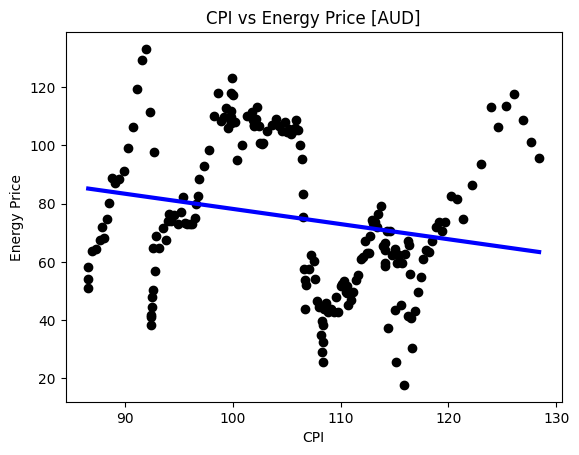

In [49]:
#cpi vs enery_price [aud]
regr = linear_model.LinearRegression()
x = df_au[['cpi-index']]
y = df_au[['energy_price']]
regr.fit(x,y)

plt.scatter(x,y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.title('CPI vs Energy Price [AUD]')
plt.xlabel('CPI')
plt.ylabel('Energy Price')
plt.show()

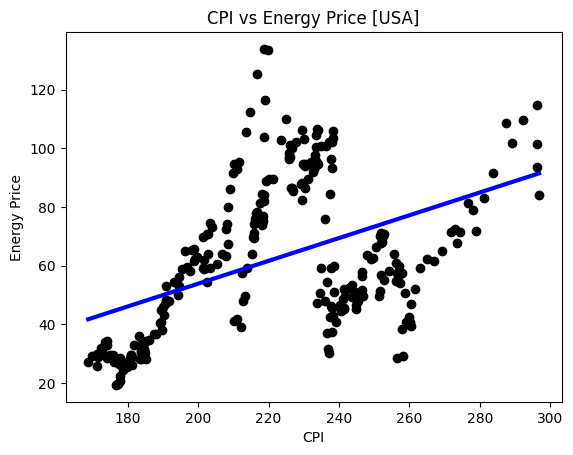

In [50]:
#cpi vs enery_price [usa]
regr = linear_model.LinearRegression()
x = df_us[['cpi-index']]
y = df_us[['energy_price']]
regr.fit(x,y)

plt.scatter(x,y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.title('CPI vs Energy Price [USA]')
plt.xlabel('CPI')
plt.ylabel('Energy Price')
plt.show()

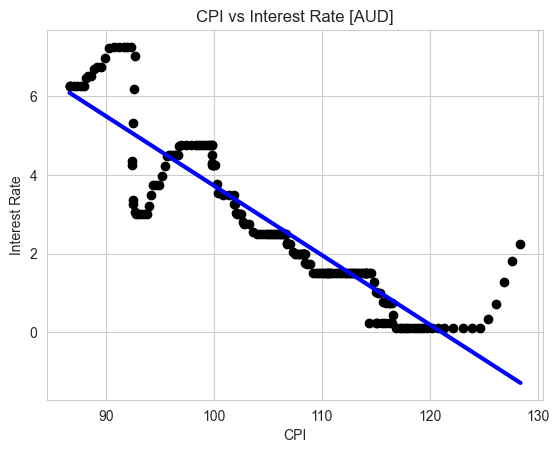

In [98]:
#cpi vs interest_rate_immediate_term [aud]
regr = linear_model.LinearRegression()
x = df_au[['cpi-index']]
y = df_au[['interest_rate_immediate_term']]
regr.fit(x,y)

plt.scatter(x,y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.title('CPI vs Interest Rate [AUD]')
plt.xlabel('CPI')
plt.ylabel('Interest Rate')
plt.show()

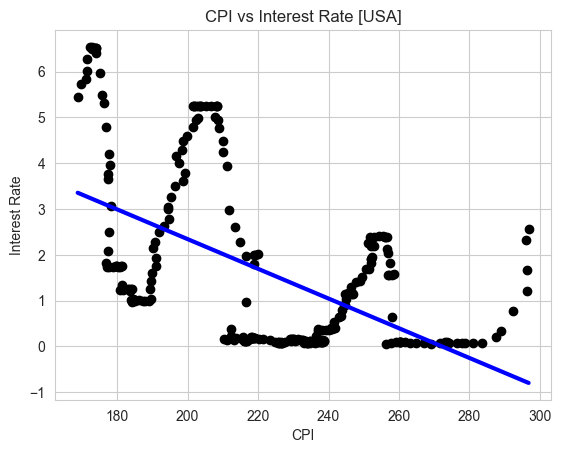

In [99]:
#cpi vs interest_rate_immediate_term [usa]
regr = linear_model.LinearRegression()
x = df_us[['cpi-index']]
y = df_us[['interest_rate_immediate_term']]
regr.fit(x,y)

plt.scatter(x,y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.title('CPI vs Interest Rate [USA]')
plt.xlabel('CPI')
plt.ylabel('Interest Rate')
plt.show()

In [ ]:
##################################__CORELATION__################################################

,interest_rate_long_term,year,month,interest_rate_short_term,interest_rate_immediate_term,cpi-index,energy_price,energy_price_lag_1m,energy_price_lag_2m,energy_price_lag_3m,...,energy_price_lag_39m,energy_price_lag_40m,energy_price_lag_41m,energy_price_lag_42m,energy_price_lag_43m,energy_price_lag_44m,energy_price_lag_45m,energy_price_lag_46m,energy_price_lag_47m,energy_price_lag_48m
interest_rate_long_term,1.000000,-0.891298,-0.040650,0.916869,0.904480,-0.861677,0.449249,0.433818,0.406427,0.374469,...,-0.161198,-0.177241,-0.191064,-0.203808,-0.215180,-0.229054,-0.247602,-0.265864,-0.281183,-0.296449
year,-0.891298,1.000000,-0.034884,-0.906092,-0.922211,0.990401,-0.276448,-0.280868,-0.285323,-0.291586,...,0.128875,0.147248,0.162568,0.178803,0.195727,0.212817,0.231060,0.246458,0.257346,0.262961
month,-0.040650,-0.034884,1.000000,-0.020849,-0.020902,0.033470,0.001544,0.050197,0.078167,0.082848,...,0.117647,0.101083,0.070652,0.028283,-0.006379,-0.033266,-0.054997,-0.049242,-0.021037,0.021512
interest_rate_short_term,0.916869,-0.906092,-0.020849,1.000000,0.994628,-0.888807,0.406777,0.410440,0.404273,0.389486,...,-0.223145,-0.233668,-0.242382,-0.250757,-0.259509,-0.268378,-0.277705,-0.286619,-0.293512,-0.300786
interest_rate_immediate_term,0.904480,-0.922211,-0.020902,0.994628,1.000000,-0.907927,0.400627,0.407977,0.406816,0.397767,...,-0.226025,-0.239010,-0.250136,-0.262023,-0.273550,-0.285358,-0.296669,-0.306525,-0.315307,-0.323680
cpi-index,-0.861677,0.990401,0.033470,-0.888807,-0.907927,1.000000,-0.204798,-0.200418,-0.199823,-0.205825,...,0.183372,0.199847,0.211329,0.222829,0.235956,0.249969,0.266243,0.281759,0.293799,0.300305
energy_price,0.449249,-0.276448,0.001544,0.406777,0.400627,-0.204798,1.000000,0.964660,0.901816,0.826921,...,-0.076309,-0.082736,-0.088714,-0.094069,-0.097682,-0.101931,-0.111917,-0.119314,-0.125601,-0.130695
energy_price_lag_1m,0.433818,-0.280868,0.050197,0.410440,0.407977,-0.200418,0.964660,1.000000,0.964704,0.902162,...,-0.058480,-0.068539,-0.076700,-0.082503,-0.087245,-0.090501,-0.094033,-0.104620,-0.113377,-0.121651
energy_price_lag_2m,0.406427,-0.285323,0.078167,0.404273,0.406816,-0.199823,0.901816,0.964704,1.000000,0.964792,...,-0.038737,-0.049615,-0.061812,-0.069778,-0.074810,-0.079095,-0.081449,-0.085655,-0.097931,-0.109250
energy_price_lag_3m,0.374469,-0.291586,0.082848,0.389486,0.397767,-0.205825,0.826921,0.902162,0.964792,1.000000,...,-0.020327,-0.029527,-0.043052,-0.055060,-0.062047,-0.066502,-0.069634,-0.072611,-0.078936,-0.094592


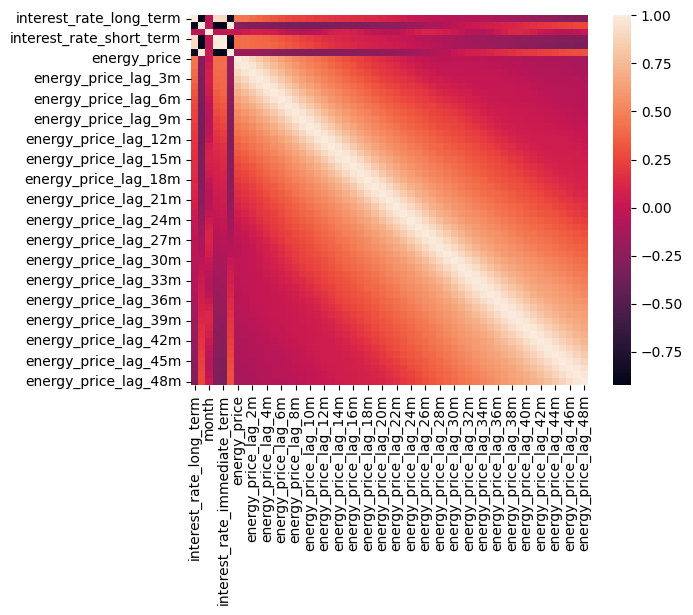

In [13]:
method='pearson'
min_periods=1

df_au = df[df['location'] == 'AUS']

sns.heatmap(df_au.corr(numeric_only=True,method=method, min_periods=min_periods))
df_au.corr(numeric_only=True,method=method)

,interest_rate_long_term,year,month,interest_rate_short_term,interest_rate_immediate_term,cpi-index,energy_price,energy_price_lag_1m,energy_price_lag_2m,energy_price_lag_3m,...,energy_price_lag_39m,energy_price_lag_40m,energy_price_lag_41m,energy_price_lag_42m,energy_price_lag_43m,energy_price_lag_44m,energy_price_lag_45m,energy_price_lag_46m,energy_price_lag_47m,energy_price_lag_48m
interest_rate_long_term,1.000000,-0.863408,-0.053153,0.767289,0.769266,-0.827503,-0.302359,-0.304294,-0.313401,-0.331695,...,-0.664999,-0.664749,-0.664721,-0.661620,-0.659345,-0.658301,-0.660373,-0.661073,-0.661931,-0.664088
year,-0.863408,1.000000,-0.020812,-0.544418,-0.555717,0.986641,0.368775,0.365886,0.360595,0.358856,...,0.608082,0.614609,0.621389,0.625896,0.633048,0.639689,0.646436,0.652349,0.657132,0.659935
month,-0.053153,-0.020812,1.000000,-0.001169,-0.017956,0.019271,0.003808,0.049805,0.075716,0.077666,...,0.068313,0.054732,0.034973,0.007615,-0.013970,-0.030224,-0.040627,-0.035669,-0.010790,0.016195
interest_rate_short_term,0.767289,-0.544418,-0.001169,1.000000,0.984704,-0.511400,-0.250018,-0.239589,-0.236556,-0.242372,...,-0.623963,-0.620259,-0.616557,-0.610424,-0.604494,-0.597052,-0.587580,-0.577090,-0.566565,-0.558555
interest_rate_immediate_term,0.769266,-0.555717,-0.017956,0.984704,1.000000,-0.531066,-0.287792,-0.289416,-0.294825,-0.307738,...,-0.640619,-0.636708,-0.633336,-0.628315,-0.622683,-0.614253,-0.604162,-0.592611,-0.582367,-0.574146
cpi-index,-0.827503,0.986641,0.019271,-0.511400,-0.531066,1.000000,0.456888,0.456263,0.448270,0.440227,...,0.589454,0.594539,0.599223,0.601488,0.606999,0.612880,0.619322,0.625900,0.631370,0.633129
energy_price,-0.302359,0.368775,0.003808,-0.250018,-0.287792,0.456888,1.000000,0.975493,0.936103,0.889826,...,0.442182,0.441168,0.438628,0.436323,0.430996,0.425973,0.417140,0.410197,0.401075,0.389667
energy_price_lag_1m,-0.304294,0.365886,0.049805,-0.239589,-0.289416,0.456263,0.975493,1.000000,0.976752,0.936274,...,0.449613,0.444834,0.442567,0.441706,0.438490,0.434286,0.429465,0.421724,0.413100,0.402380
energy_price_lag_2m,-0.313401,0.360595,0.075716,-0.236556,-0.294825,0.448270,0.936103,0.976752,1.000000,0.975890,...,0.460184,0.453190,0.447516,0.445937,0.445150,0.442927,0.439040,0.434921,0.425615,0.415229
energy_price_lag_3m,-0.331695,0.358856,0.077666,-0.242372,-0.307738,0.440227,0.889826,0.936274,0.975890,1.000000,...,0.473603,0.465422,0.457463,0.451558,0.450883,0.450732,0.448888,0.445627,0.440132,0.428505


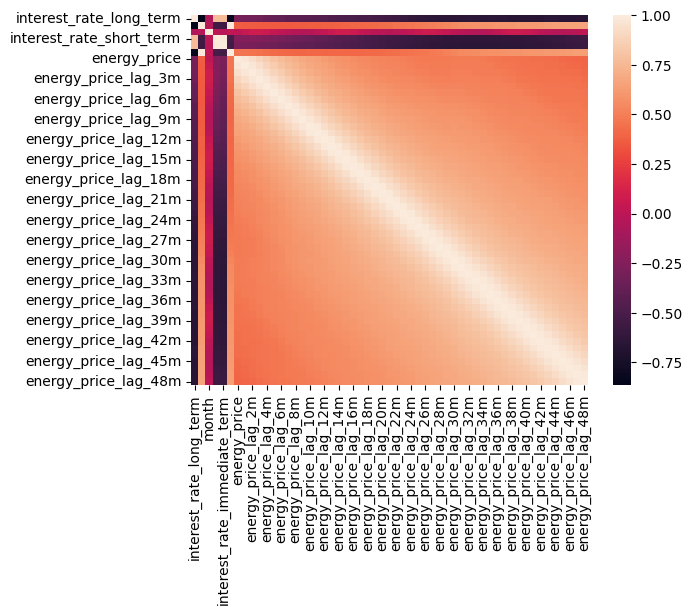

In [14]:
df_us = df[df['location'] == 'USA']

sns.heatmap(df_us.corr(numeric_only=True,method=method, min_periods=min_periods))
df_us.corr(numeric_only=True,method=method)

In [20]:
#sns.pairplot(df_au)

In [21]:
#sns.pairplot(df_us)

In [ ]:
##################################__CHANGE OVER TIME__################################################

array([<AxesSubplot: xlabel='year,month'>,
       <AxesSubplot: xlabel='year,month'>], dtype=object)

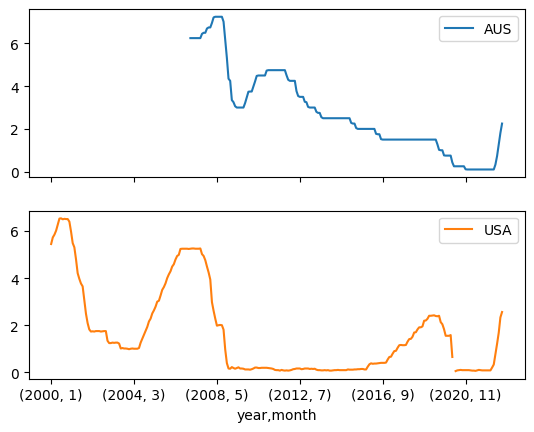

In [15]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='interest_rate_immediate_term'
              ).plot(subplots=True)

array([<AxesSubplot: xlabel='year,month'>,
       <AxesSubplot: xlabel='year,month'>], dtype=object)

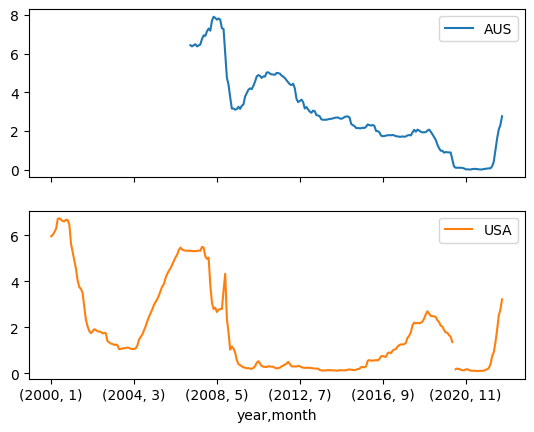

In [16]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='interest_rate_short_term'
              ).plot(subplots=True)

array([<AxesSubplot: xlabel='year,month'>,
       <AxesSubplot: xlabel='year,month'>], dtype=object)

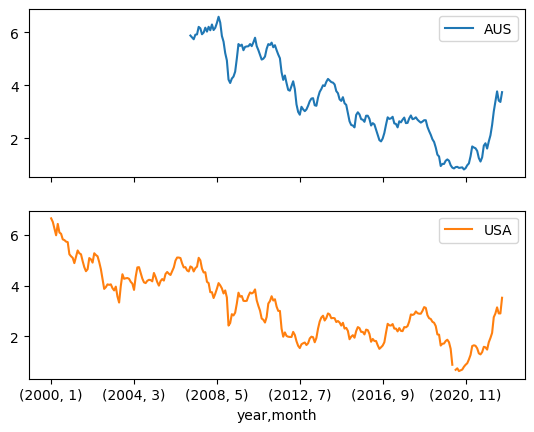

In [17]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='interest_rate_long_term'
              ).plot(subplots=True)

array([<AxesSubplot: xlabel='year,month'>,
       <AxesSubplot: xlabel='year,month'>], dtype=object)

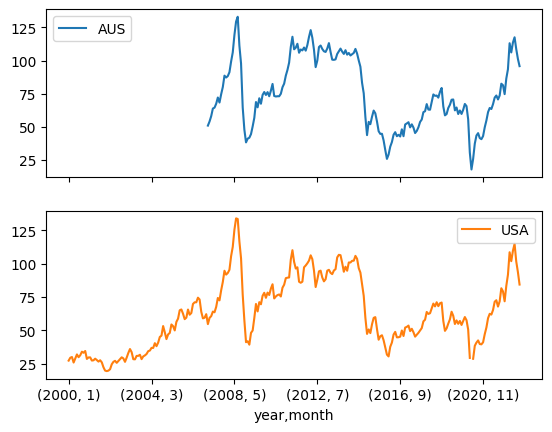

In [18]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='energy_price'
              ).plot(subplots=True)

array([<AxesSubplot: xlabel='year,month'>,
       <AxesSubplot: xlabel='year,month'>], dtype=object)

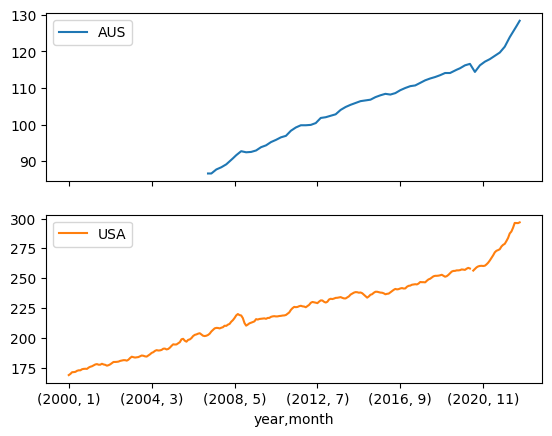

In [19]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='cpi-index'
              ).plot(subplots=True)

In [ ]:
##################################__NORMAL DISTRIBUSION__################################################

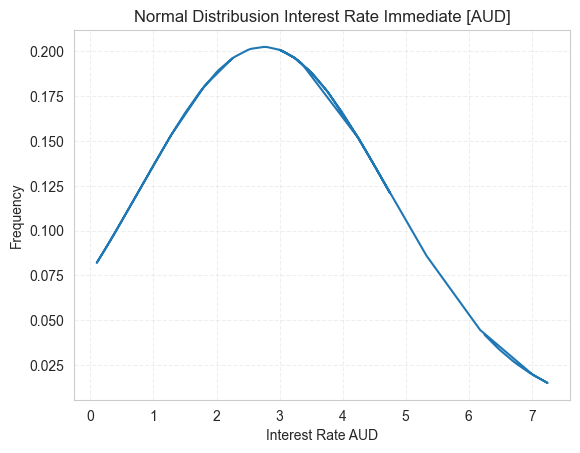

In [101]:
#normal distribusion interest rate [aud]
x = df_au['interest_rate_immediate_term']

#mean
df_mean = np.mean(x)
#standard deviation
df_std = np.std(x)

# Calculating probability density function (PDF)
pdf = norm.pdf(x, df_mean, df_std)

plt.plot(x, pdf)
plt.xlabel("Interest Rate AUD")
plt.ylabel("Frequency")  
plt.title('Normal Distribusion Interest Rate Immediate [AUD]')
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

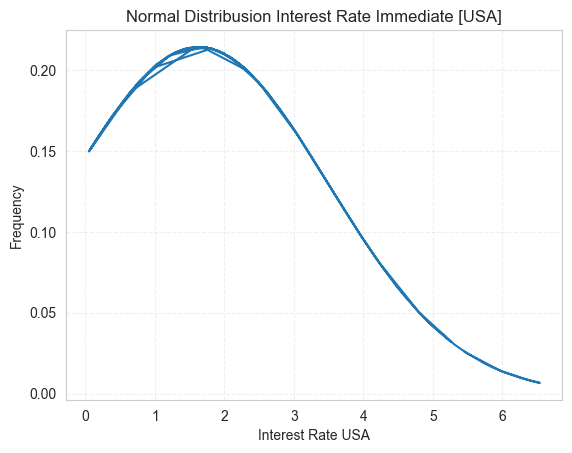

In [112]:
#normal distribusion interest rate [USA]
x = df_us['interest_rate_immediate_term']

#mean
df_mean = np.mean(x)
#standard deviation
df_std = np.std(x)

# Calculating probability density function (PDF)
pdf = norm.pdf(x, df_mean, df_std)

plt.plot(x, pdf)
plt.xlabel("Interest Rate USA")
plt.ylabel("Frequency")  
plt.title('Normal Distribusion Interest Rate Immediate [USA]')
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

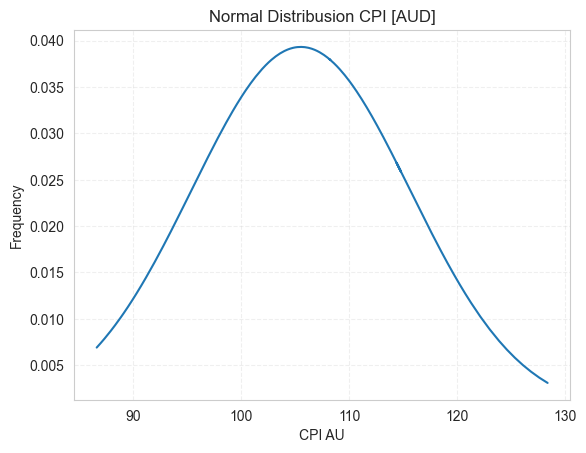

In [115]:
#normal distribusion cpi [aud]
x = df_au['cpi-index']

#mean
df_mean = np.mean(x)
#standard deviation
df_std = np.std(x)

# Calculating probability density function (PDF)
pdf = norm.pdf(x, df_mean, df_std)

plt.plot(x, pdf)
plt.xlabel("CPI AU")
plt.ylabel("Frequency")  
plt.title('Normal Distribusion CPI [AUD]')
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

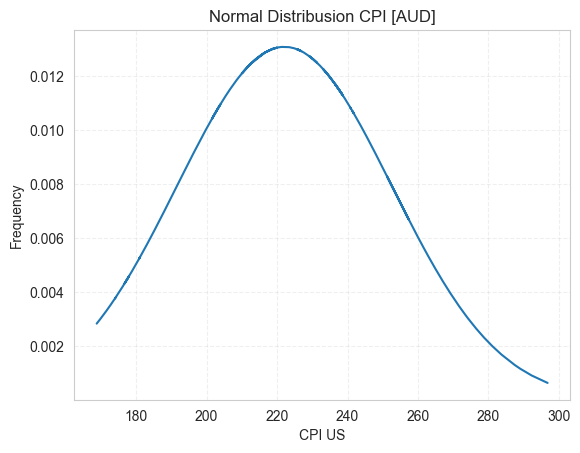

In [116]:
#normal distribusion cpi [usa]
x = df_us['cpi-index']

#mean
df_mean = np.mean(x)
#standard deviation
df_std = np.std(x)

# Calculating probability density function (PDF)
pdf = norm.pdf(x, df_mean, df_std)

plt.plot(x, pdf)
plt.xlabel("CPI US")
plt.ylabel("Frequency")  
plt.title('Normal Distribusion CPI [AUD]')
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

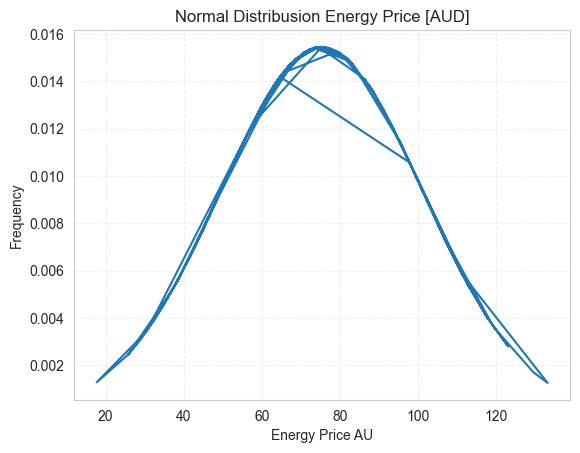

In [113]:
#normal distribusion energy price [aud]
x = df_au['energy_price']

#mean
df_mean = np.mean(x)
#standard deviation
df_std = np.std(x)

# Calculating probability density function (PDF)
pdf = norm.pdf(x, df_mean, df_std)

plt.plot(x, pdf)
plt.xlabel("Energy Price AU")
plt.ylabel("Frequency")  
plt.title('Normal Distribusion Energy Price [AUD]')
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

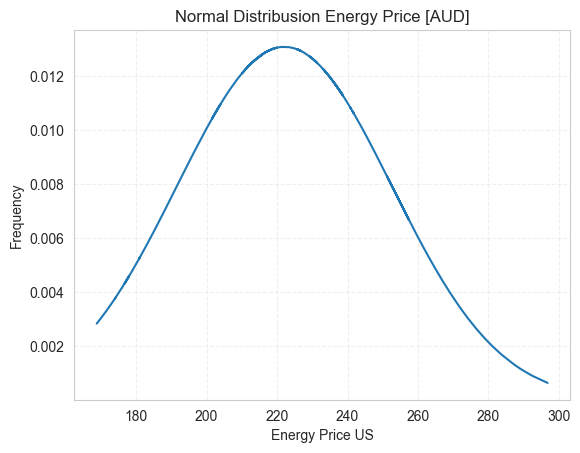

In [114]:
#normal distribusion energy_price [usa]
x = df_us['cpi-index']

#mean
df_mean = np.mean(x)
#standard deviation
df_std = np.std(x)

# Calculating probability density function (PDF)
pdf = norm.pdf(x, df_mean, df_std)

plt.plot(x, pdf)
plt.xlabel("Energy Price US")
plt.ylabel("Frequency")  
plt.title('Normal Distribusion Energy Price [AUD]')
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()